# Explore here

In [4]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter=",")

dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
if dataframe.isna().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
    dataframe.dropna(inplace=True, axis=1, how=all)

if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)

dataframe.describe()


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataframe = dataframe.drop("sex", axis=1)
dataframe["smoker"] = dataframe["smoker"].map({"no": 0, "yes": 1})
dataframe = pd.get_dummies(dataframe, columns=['region'], drop_first=True)

dataframe.head()


,age,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,True
1,18,33.770,1,0,1725.55230,False,True,False
2,28,33.000,3,0,4449.46200,False,True,False
3,33,22.705,0,0,21984.47061,True,False,False
4,32,28.880,0,0,3866.85520,True,False,False


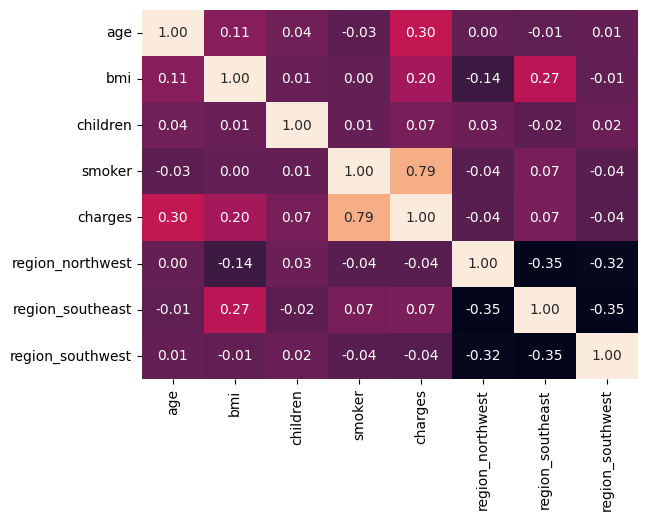

In [7]:
sns.heatmap(dataframe.corr(numeric_only=True),  annot = True, fmt = ".2f", cbar = False)
plt.show()


In [12]:
X = dataframe.drop("charges", axis=1)
y = dataframe["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.to_csv("../data/processed/X_train.csv")
X_test.to_csv("../data/processed/X_test.csv")
y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

X_test_scaled.describe()




,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.008494,0.101463,0.048235,0.059213,-0.053518,0.042508,-0.055616
std,1.018533,1.037898,1.046035,1.043691,0.968416,1.022992,0.967188
min,-1.515026,-2.269037,-0.907908,-0.500292,-0.572669,-0.605812,-0.574110
25%,-0.961140,-0.617527,-0.907908,-0.500292,-0.572669,-0.605812,-0.574110
50%,0.057296,0.094987,-0.070502,-0.500292,-0.572669,-0.605812,-0.574110
75%,0.843457,0.780016,0.766904,-0.500292,-0.572669,1.650678,-0.574110
max,1.772556,2.897924,3.279123,1.998831,1.746208,1.650678,1.741827


In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")


Intercept (a): 13030.203369289053
Coefficients (b1, b2): [3474.63142797 1925.04763309  636.5684267  9230.02784729 -169.27700793
 -370.39630339 -283.27989874]


In [14]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[ 8.19852709e+03  5.68992842e+03  1.43158647e+04  3.17813729e+04
  9.01102897e+03  1.32008994e+04  3.03797979e+04  1.40564549e+03
  1.05827466e+04  1.13703362e+04  1.03324487e+04  3.31598447e+04
  3.11142382e+04  1.73598417e+04  1.07462594e+04  9.58361031e+03
  4.21075697e+03  3.17713986e+04  3.27414929e+03  5.18077706e+03
  3.49795359e+03  3.03238094e+04  1.48462093e+04  3.05002547e+04
  3.10416277e+04  5.45617040e+03  3.54397491e+04  3.66141867e+04
  1.13618615e+04  1.42546127e+04  6.44957098e+03  1.27761358e+04
  4.53781522e+02  1.21452608e+04  3.95939873e+04  1.22908481e+04
  4.69442935e+03  3.87065101e+03  3.09090692e+04  8.91227884e+03
  6.99604238e+03  3.00556099e+04  3.48208808e+04  1.23422471e+04
  7.31084974e+03  3.37298252e+03  6.15389096e+03  8.93577599e+03
  4.21253722e+03  9.07229884e+03  6.55071869e+03  1.21246255e+04
  3.11853568e+04  3.60297337e+03  1.10981396e+04  9.78884526e+03
  1.08910647e+04  2.37916321e+03  3.12014443e+04  9.45529674e+03
  1.55272693e+04  8.14102

In [15]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35492162.890434414
Coefficient of determination: 0.8068517462232095
